# Lab Task 4

## Upload files

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving indian_liver_patient.csv to indian_liver_patient.csv
User uploaded file "indian_liver_patient.csv" with length 23347 bytes


## Import necessary

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [3]:
liver_df = pd.read_csv('indian_liver_patient.csv')
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
liver_df.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [6]:
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

## Data Visualization

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


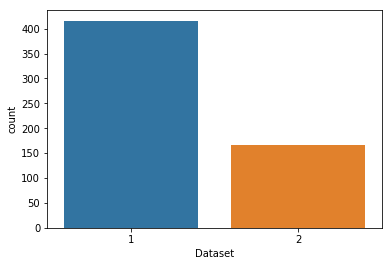

In [7]:
sns.countplot(data=liver_df, x='Dataset', label='Count')
LD, NLD = liver_df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ', LD)
print('Number of patients not diagnosed with liver disease: ', NLD)

Number of patients that are male:  441
Number of patients that are female:  142


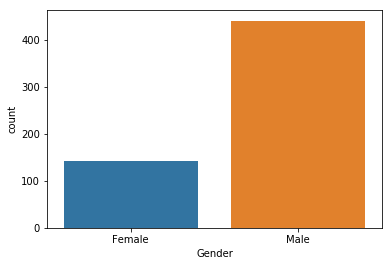

In [8]:
sns.countplot(data=liver_df, x='Gender', label='Count')
M, F = liver_df['Gender'].value_counts()
print('Number of patients that are male: ', M)
print('Number of patients that are female: ', F)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


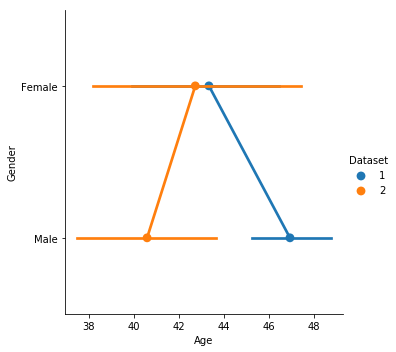

In [9]:
sns.factorplot(x="Age", y="Gender", hue="Dataset", data=liver_df)

In [10]:
liver_df[['Gender', 'Dataset', 'Age']]\
    .groupby(['Dataset', 'Gender'], as_index=False)\
    .count()\
    .sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
2,2,Female,50
3,2,Male,117
0,1,Female,92
1,1,Male,324


In [11]:
liver_df[['Gender', 'Dataset', 'Age']]\
    .groupby(['Dataset', 'Gender'], as_index=False)\
    .mean()\
    .sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
2,2,Female,42.740000
3,2,Male,40.598291
0,1,Female,43.347826
1,1,Male,46.950617


Text(0.5, 0.98, 'Disease by Gender and Age')

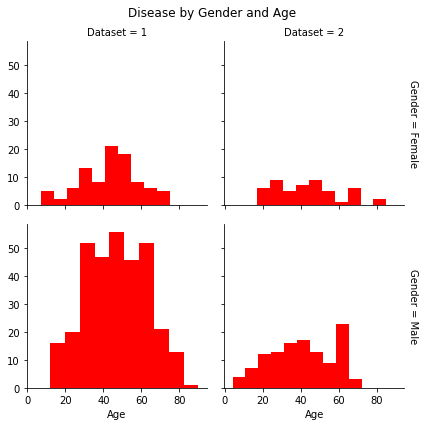

In [12]:
g = sns.FacetGrid(liver_df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age')

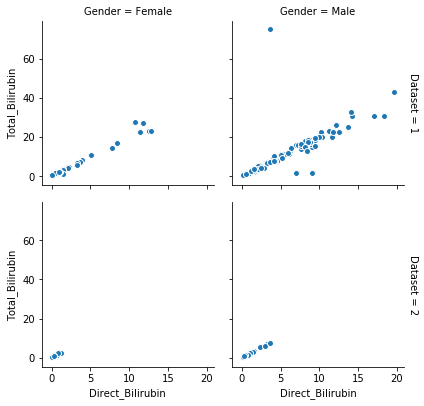

In [13]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter, "Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

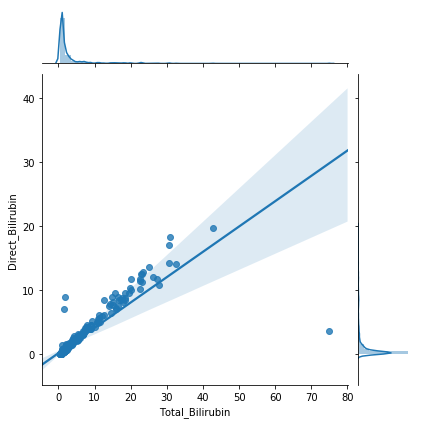

In [14]:
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=liver_df, kind="reg")

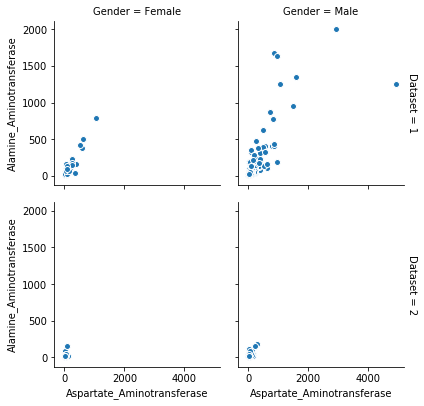

In [15]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter, "Aspartate_Aminotransferase", "Alamine_Aminotransferase",
      edgecolor="w")
plt.subplots_adjust(top=0.9)

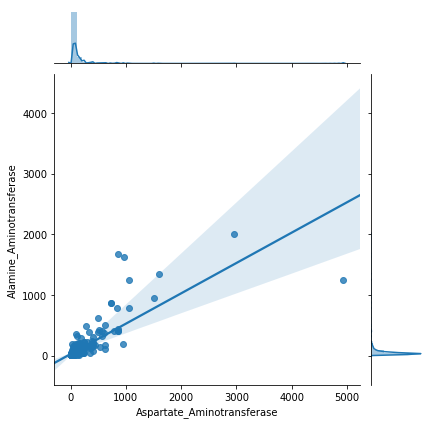

In [16]:
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase",
              data=liver_df, kind="reg")

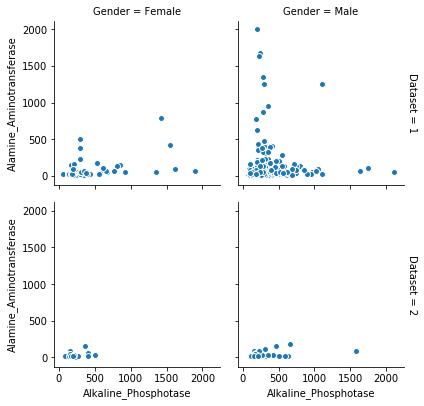

In [17]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter, "Alkaline_Phosphotase", "Alamine_Aminotransferase",
      edgecolor="w")
plt.subplots_adjust(top=0.9)

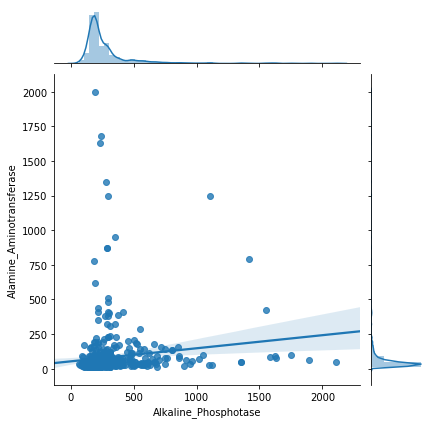

In [18]:
sns.jointplot("Alkaline_Phosphotase", "Alamine_Aminotransferase",
              data=liver_df, kind="reg")

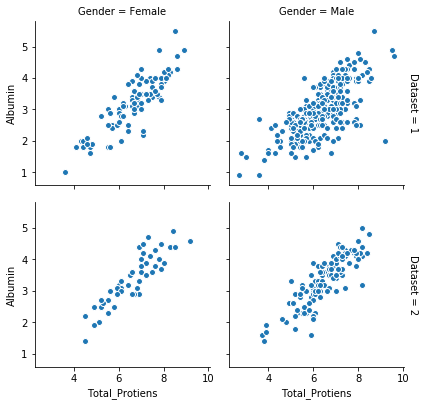

In [19]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter, "Total_Protiens", "Albumin", edgecolor="w")
plt.subplots_adjust(top=0.9)

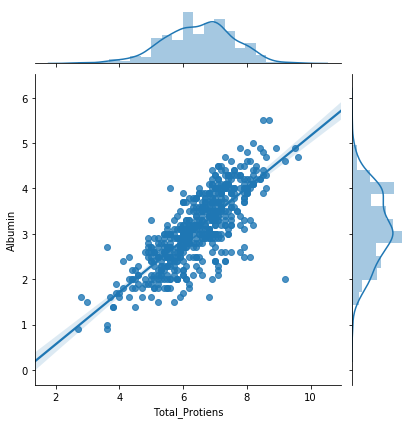

In [20]:
sns.jointplot("Total_Protiens", "Albumin", data=liver_df, kind="reg")

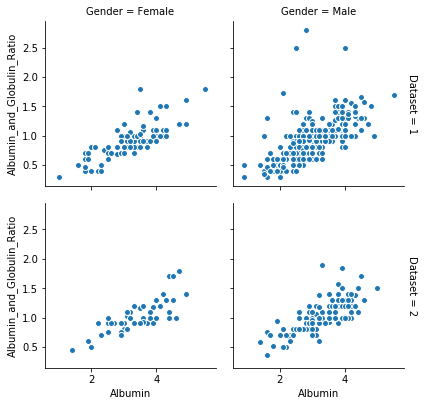

In [21]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter, "Albumin", "Albumin_and_Globulin_Ratio", edgecolor="w")
plt.subplots_adjust(top=0.9)

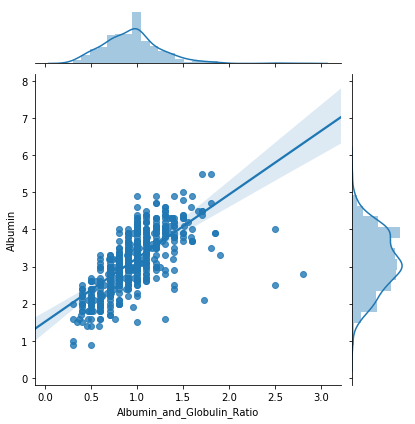

In [22]:
sns.jointplot("Albumin_and_Globulin_Ratio", "Albumin",
              data=liver_df, kind="reg")

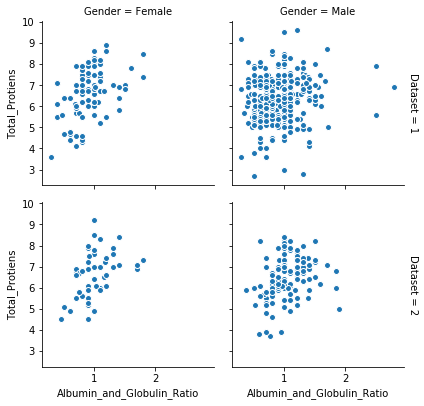

In [23]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter, "Albumin_and_Globulin_Ratio", "Total_Protiens",
      edgecolor="w")
plt.subplots_adjust(top=0.9)

## Hence from the aforementioned information we will only use the
following features:

1.   Total_Bilirubin
2.   Alamine_Aminotransferase
3.   Total_Protiens
4.   Albumin_and_Globulin_Ratio
5.   Albumin
6.   Age
7.   Gender
8.   Dataset



In [24]:
liver_df = pd.concat([liver_df, pd.get_dummies(
        liver_df['Gender'], prefix='Gender')], axis=1)
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [25]:
liver_df[liver_df['Albumin_and_Globulin_Ratio'].isnull()]
# the columns having null values

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1,1,0
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1,0,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2,1,0
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2,0,1


In [0]:
liver_df["Albumin_and_Globulin_Ratio"] = liver_df\
    .Albumin_and_Globulin_Ratio\
    .fillna(liver_df['Albumin_and_Globulin_Ratio'].mean())

In [0]:
# Building ML MODEL
Droop_gender = liver_df.drop(labels=['Gender'], axis=1)
X = Droop_gender
y = liver_df['Dataset']

In [0]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=101)

In [29]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
# Predicting Output
rf_predicted = random_forest.predict(X_test)
random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)

print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test, rf_predicted))
print(confusion_matrix(y_test, rf_predicted))
print(classification_report(y_test, rf_predicted))

Random Forest Score: 
 100.0
Random Forest Test Score: 
 100.0
Accuracy: 
 1.0
[[124   0]
 [  0  51]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       124
           2       1.00      1.00      1.00        51

    accuracy                           1.00       175
   macro avg       1.00      1.00      1.00       175
weighted avg       1.00      1.00      1.00       175



In [30]:
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
# Predict Output
log_predicted = logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
# Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test, log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test, log_predicted))
print('Classification Report: \n',
      classification_report(y_test, log_predicted))

Logistic Regression Training Score: 
 100.0
Logistic Regression Test Score: 
 98.86
Coefficient: 
 [[-3.61842884e-02 -2.35758572e-01 -5.50833198e-03 -5.36935885e-04
  -6.02768391e-03 -7.33968459e-03 -8.97245204e-01  4.75630916e-01
  -4.95118468e-01  6.02857390e+00 -4.73341804e-01 -7.39013220e-01]]
Intercept: 
 [-1.21235502]
Accuracy: 
 0.9885714285714285
Confusion Matrix: 
 [[123   1]
 [  1  50]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       124
           2       0.98      0.98      0.98        51

    accuracy                           0.99       175
   macro avg       0.99      0.99      0.99       175
weighted avg       0.99      0.99      0.99       175



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Score': [logreg_score, random_forest_score],
    'Test Score': [logreg_score_test, random_forest_score_test]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
1,Random Forest,100.0,100.00
0,Logistic Regression,100.0,98.86
